# Linear Regression


In [21]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
df = pd.read_csv(r'C:\Users\ASUS\Desktop\DS\DSProject-Flights\clean_data.csv')
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23556\2642509250.py:1: DtypeWarning: Columns (14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ASUS\Desktop\DS\DSProject-Flights\clean_data.csv')


,Origin,Destination,TTT,LOS,Arrival Time,Return Arrival Time,Onward Departure Airport,Onward Arrival Airport,Return Departure Airport,Return Arrival Airport,...,Departure Time Category Num,Return Time Category Num,Is Weekend Flight,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Total Connections,Total Flight Duration(min),Flight Duration Binned
0,London,Paris,1,1,3/7/2025 16:30,3/8/2025 19:25,SEN,CDG,ORY,LGW,...,2,3,True,64,25,13,45,0,135,0-200
1,London,Paris,1,1,3/7/2025 16:30,3/8/2025 14:25,SEN,CDG,ORY,LHR,...,2,2,True,64,25,13,23,0,145,0-200
2,London,Paris,1,1,3/7/2025 16:30,3/8/2025 14:50,SEN,CDG,CDG,LGW,...,2,2,True,64,25,25,45,0,135,0-200
3,London,Paris,1,1,3/7/2025 16:30,3/8/2025 12:00,SEN,CDG,ORY,LGW,...,2,1,True,64,25,13,45,0,140,0-200
4,London,Paris,1,1,3/7/2025 16:30,3/8/2025 15:20,SEN,CDG,ORY,LGW,...,2,2,True,64,25,13,45,0,140,0-200


In [23]:
# Check the structure of the dataset
df.info()

# Display basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527232 entries, 0 to 527231
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Origin                             527232 non-null  object
 1   Destination                        527232 non-null  object
 2   TTT                                527232 non-null  int64 
 3   LOS                                527232 non-null  int64 
 4   Arrival Time                       527232 non-null  object
 5   Return Arrival Time                527232 non-null  object
 6   Onward Departure Airport           527232 non-null  object
 7   Onward Arrival Airport             527232 non-null  object
 8   Return Departure Airport           527232 non-null  object
 9   Return Arrival Airport             527232 non-null  object
 10  Onward Airlines                    527232 non-null  object
 11  Return Airlines                    527232 non-null  

,TTT,LOS,Onward Flight Connections,Onward Connection Duration(min),Return Flight Connections,Return Connection Duration(min),Carry-ons,Checked Bags,Price(NIS),Total Onward Flight Duration(min),...,Return Day,Return Weekday,Departure Time Category Num,Return Time Category Num,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Total Connections,Total Flight Duration(min)
count,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.00000,527232.000000,527232.000000,527232.000000,527232.000000,...,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000,527232.000000
mean,15.527781,2.993612,0.005127,0.921192,0.005280,1.04271,0.112493,0.006261,594.694789,121.181558,...,16.213113,3.013518,1.795703,1.806787,33.516820,33.219298,33.621668,33.153344,0.010407,242.606168
std,8.583505,1.411998,0.072079,21.772410,0.073488,24.15458,0.315973,0.081154,207.361836,44.046941,...,9.099821,1.994234,0.793875,0.803933,16.810686,16.348130,16.894544,16.528630,0.106142,81.497798
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,168.000000,60.000000,...,1.000000,0.000000,0.000000,0.000000,11.000000,11.000000,11.000000,11.000000,0.000000,130.000000
25%,8.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,435.000000,80.000000,...,8.000000,1.000000,1.000000,1.000000,23.000000,23.000000,23.000000,23.000000,0.000000,155.000000
50%,16.000000,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,585.000000,130.000000,...,17.000000,3.000000,2.000000,2.000000,32.000000,32.000000,32.000000,32.000000,0.000000,255.000000
75%,23.000000,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,728.000000,150.000000,...,24.000000,5.000000,2.000000,2.000000,45.000000,45.000000,45.000000,45.000000,0.000000,310.000000
max,30.000000,5.000000,2.000000,1560.000000,2.000000,1785.00000,1.000000,2.000000,1342.000000,2380.000000,...,31.000000,6.000000,3.000000,3.000000,85.000000,85.000000,85.000000,85.000000,3.000000,3635.000000


In [24]:
features = [
    "Carry-ons", 
    "Departure Day", 
    "Departure Month", 
    "Onward Departure Airport Distance", 
    "Return Day",
    "Onward Arrival Airport Distance", 
    "Return Arrival Airport Distance", 
    "TTT" 
]

target = "Price(NIS)"


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Selecting only the chosen features
X = df[features]
y = df[target]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred = lin_reg.predict(X_test)

# Model performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (Normalized): {mse:.2f}")
print(f"Mean Absolute Error (Normalized): {mae:.2f}")
print(f"R-squared Score (Normalized): {r2:.2f}")


Mean Squared Error (Normalized): 38955.41
Mean Absolute Error (Normalized): 157.88
R-squared Score (Normalized): 0.09


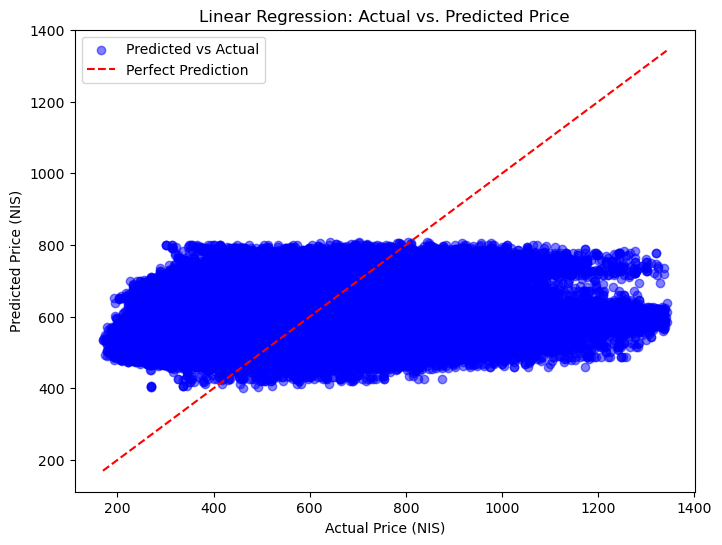

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Prediction")
plt.xlabel("Actual Price (NIS)")
plt.ylabel("Predicted Price (NIS)")
plt.title("Linear Regression: Actual vs. Predicted Price")
plt.legend()
plt.show()


In [27]:
coefficients = pd.DataFrame(lin_reg.coef_, features, columns=["Coefficient"])
coefficients.sort_values(by="Coefficient", ascending=False)

,Coefficient
Departure Month,91.493001
Carry-ons,38.781100
Departure Day,29.170268
Return Day,-3.683020
Return Arrival Airport Distance,-12.247607
Onward Departure Airport Distance,-17.313707
Onward Arrival Airport Distance,-22.671607
TTT,-78.855904


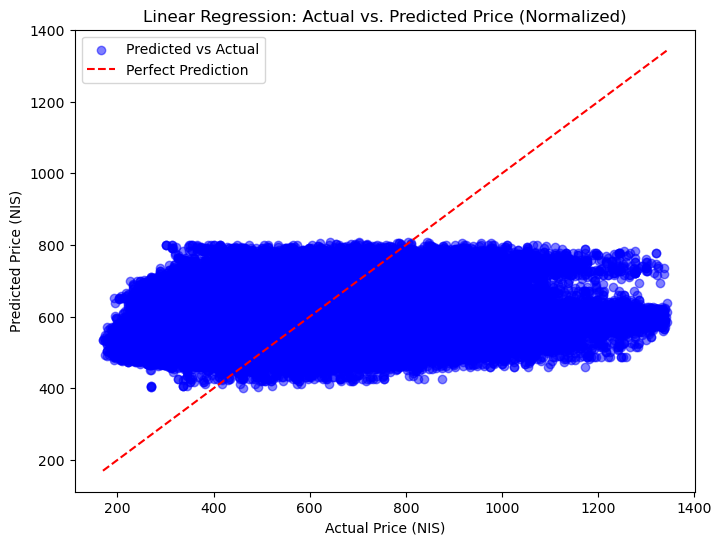

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Prediction")
plt.xlabel("Actual Price (NIS)")
plt.ylabel("Predicted Price (NIS)")
plt.title("Linear Regression: Actual vs. Predicted Price (Normalized)")
plt.legend()
plt.show()

In [29]:
print(df.columns.tolist())

['Origin', 'Destination', 'TTT', 'LOS', 'Arrival Time', 'Return Arrival Time', 'Onward Departure Airport', 'Onward Arrival Airport', 'Return Departure Airport', 'Return Arrival Airport', 'Onward Airlines', 'Return Airlines', 'Onward Flight Connections', 'Onward Connection Duration(min)', 'Onward Flight Connection Airport', 'Return Flight Connections', 'Return Connection Duration(min)', 'Return Flight Connection Airport', 'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Date', 'Site', 'Total Onward Flight Duration(min)', 'Total Return Flight Duration(min)', 'Departure Month', 'Departure Day', 'Departure Weekday', 'Return Month', 'Return Day', 'Return Weekday', 'Departure Time Category Num', 'Return Time Category Num', 'Is Weekend Flight', 'Onward Departure Airport Distance', 'Onward Arrival Airport Distance', 'Return Departure Airport Distance', 'Return Arrival Airport Distance', 'Total Connections', 'Total Flight Duration(min)', 'Flight Duration Binned']


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Updated feature list
features_updated = [
    "Carry-ons",
    "Departure Day",
    "Departure Month",
    "Onward Departure Airport Distance", 
    "Return Day",
    "Onward Arrival Airport Distance", 
    "Return Arrival Airport Distance", 
    "TTT",
    "Total Connections",  # Total number of connections
    "Departure Weekday",  # Weekday of onward flight
    "Return Weekday"  # Weekday of return flight
]

# Standardizing the features
scaler = StandardScaler()
X_scaled_updated = scaler.fit_transform(df[features_updated])

# Define target variable
y = df["Price(NIS)"]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled_updated, y, test_size=0.3, random_state=101)

# Train the Linear Regression model
lin_reg_updated = LinearRegression()
lin_reg_updated.fit(X_train, y_train)

# Predictions
y_pred_updated = lin_reg_updated.predict(X_test)

# Model performance metrics
mse_updated = mean_squared_error(y_test, y_pred_updated)
mae_updated = mean_absolute_error(y_test, y_pred_updated)
r2_updated = r2_score(y_test, y_pred_updated)

# Print results
print(f"Mean Squared Error (Updated): {mse_updated:.2f}")
print(f"Mean Absolute Error (Updated): {mae_updated:.2f}")
print(f"R-squared Score (Updated): {r2_updated:.2f}")


Mean Squared Error (Updated): 38768.26
Mean Absolute Error (Updated): 157.63
R-squared Score (Updated): 0.10


In [31]:
# Convert 'Onward Airlines' and 'Return Airlines' into dummy variables
data_encoded = pd.get_dummies(df, columns=["Onward Airlines", "Return Airlines"], drop_first=True)

# Define the final feature list (normalized numerical features + airline dummies)
features_final = [
    "Carry-ons", "Departure Day", "Departure Month", 
    "Onward Departure Airport Distance", "Return Day", 
    "Onward Arrival Airport Distance", "Return Arrival Airport Distance", "TTT"
] + list(data_encoded.columns.difference(df.columns))  # Add only the new dummy variables

# Standardizing only the numerical features
scaler = StandardScaler()
data_encoded[["Carry-ons", "Departure Day", "Departure Month", 
              "Onward Departure Airport Distance", "Return Day", 
              "Onward Arrival Airport Distance", "Return Arrival Airport Distance", "TTT"]] = \
    scaler.fit_transform(data_encoded[["Carry-ons", "Departure Day", "Departure Month", 
                                       "Onward Departure Airport Distance", "Return Day", 
                                       "Onward Arrival Airport Distance", "Return Arrival Airport Distance", "TTT"]])

# Define X (features) and y (target) without running the algorithm yet
X_prepared = data_encoded[features_final]
y_prepared = data_encoded["Price(NIS)"]

# Now, the dataset is fully prepared for running the regression model.


In [32]:
import pandas as pd

# Select only numeric and boolean columns
num_bool_features = df.select_dtypes(include=['number', 'bool'])

# Compute correlation with 'price'
price_corr = num_bool_features.corr()["Price(NIS)"]

# Create a DataFrame and sort by absolute correlation value
corr_table = pd.DataFrame(price_corr).reset_index()
corr_table.columns = ["Feature", "Correlation"]
corr_table["Abs_Correlation"] = corr_table["Correlation"].abs()
corr_table = corr_table.sort_values(by="Abs_Correlation", ascending=False).drop(columns=["Abs_Correlation"])

# Print the table
print(corr_table)

                              Feature  Correlation
8                          Price(NIS)     1.000000
25         Total Flight Duration(min)     0.439293
9   Total Onward Flight Duration(min)     0.409827
10  Total Return Flight Duration(min)     0.386589
6                           Carry-ons     0.198557
12                      Departure Day    -0.168935
11                    Departure Month     0.081097
20  Onward Departure Airport Distance    -0.076258
15                         Return Day    -0.074558
21    Onward Arrival Airport Distance    -0.070608
23    Return Arrival Airport Distance    -0.070343
0                                 TTT    -0.062268
22  Return Departure Airport Distance    -0.061253
19                  Is Weekend Flight     0.043409
16                     Return Weekday    -0.042786
18           Return Time Category Num    -0.042170
7                        Checked Bags     0.039901
24                  Total Connections     0.038113
2           Onward Flight Conne

In [33]:
# Drop specific 'Total' columns
columns_to_remove = ["Total Onward Flight Duration(min)", "Total Return Flight Duration(min)"]
df = df.drop(columns=columns_to_remove)

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Select only numeric and boolean columns
num_bool_features = df.select_dtypes(include=['number', 'bool'])

# Compute correlation with 'price' and sort by absolute correlation
price_corr = num_bool_features.corr()["Price(NIS)"].dropna()
corr_table = price_corr.abs().sort_values(ascending=False)

# Remove 'price' itself from the list
corr_table = corr_table.drop("Price(NIS)")

# Split data into train/test
X = df.drop(columns=['Price(NIS)'])
y = df['Price(NIS)']
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize results table
results = []

# Start with an empty feature set and add features one by one
selected_features = []
for feature in corr_table.index:
    selected_features.append(feature)
    
    # Select subset of features
    X_train = X_train_full[selected_features]
    X_test = X_test_full[selected_features]
    
    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Store results
    results.append([len(selected_features), feature, r2, mae, mse, rmse])

# Convert results to DataFrame and print
results_df = pd.DataFrame(results, columns=["Num_Features", "Added_Feature", "R²", "MAE", "MSE", "RMSE"])
print(results_df)

    Num_Features                      Added_Feature        R²         MAE  \
0              1         Total Flight Duration(min)  0.202882  146.528682   
1              2                          Carry-ons  0.234366  142.972934   
2              3                      Departure Day  0.259276  139.987204   
3              4                    Departure Month  0.266331  139.493015   
4              5  Onward Departure Airport Distance  0.276122  137.859016   
5              6                         Return Day  0.276244  137.892772   
6              7    Onward Arrival Airport Distance  0.293746  134.709459   
7              8    Return Arrival Airport Distance  0.298298  133.810337   
8              9                                TTT  0.303990  133.231424   
9             10  Return Departure Airport Distance  0.312876  132.052615   
10            11                  Is Weekend Flight  0.314598  131.906707   
11            12                     Return Weekday  0.315782  131.705433   

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ⿡ Compute correlations and sort features
df_numeric = df.select_dtypes(include=[np.number])

# חישוב מתאמים
correlations = df_numeric.corr()['Price(NIS)'].abs().sort_values(ascending=False)
sorted_features = correlations.index[1:]  # להוציא את עמודת המחיר

X = df[sorted_features]  
y = df['Price(NIS)']

# ⿢ Use RFE to pre-select important features
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)  # Change 5 based on how many features you want
X_rfe_selected = rfe.fit_transform(X, y)
selected_features = X.columns[rfe.support_]

print("RFE Selected Features:", selected_features)

# ⿣ Initialize stepwise selection
best_features = []
best_r2 = -np.inf
results = []

# ⿤ Add features one by one in a loop
for feature in selected_features:
    best_features.append(feature)
    
    # Create feature set with selected features
    X_selected = X[best_features]
    
    # Add polynomial & interaction terms
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    X_poly = poly.fit_transform(X_selected)
    
    # Train model
    model.fit(X_poly, y)
    
    # Make predictions
    y_pred = model.predict(X_poly)
    
    # Compute metrics
    r2 = model.score(X_poly, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    
    # Store results
    results.append([len(best_features), feature, r2, mae, mse, rmse])
    
    # Stop if adding features doesn't improve R²
    if r2 < best_r2:
        best_features.pop()  # Remove last added feature
    else:
        best_r2 = r2  # Update best R²

# ⿥ Print final results
results_df = pd.DataFrame(results, columns=['Num_Features', 'Feature', 'R²', 'MAE', 'MSE', 'RMSE'])
print(results_df.sort_values(by='R²', ascending=False))

RFE Selected Features: Index(['Carry-ons', 'Departure Month', 'TTT', 'Return Weekday', 'Checked Bags',
       'Total Connections', 'Onward Flight Connections',
       'Return Flight Connections', 'Departure Time Category Num',
       'Return Month'],
      dtype='object')
   Num_Features                      Feature        R²         MAE  \
9            10                 Return Month  0.110641  158.012183   
8             9  Departure Time Category Num  0.101778  158.671215   
7             8    Return Flight Connections  0.100385  158.872770   
6             7    Onward Flight Connections  0.100374  158.873043   
5             6            Total Connections  0.100265  158.881736   
4             5                 Checked Bags  0.097880  159.034427   
3             4               Return Weekday  0.096213  159.118714   
2             3                          TTT  0.094217  159.277723   
1             2              Departure Month  0.044767  163.467022   
0             1            

## Conclusion

We tested various predictive approaches and evaluated the effectiveness of **Linear Regression** for flight price prediction.  
The best **R² score** achieved was **0.40**, indicating that the model explains only 40% of the variance in flight prices.

This result suggests that **flight pricing is not well-captured by a linear model**, which is expected given the complex, nonlinear nature of airfare pricing. Flight prices are influenced by dynamic factors such as supply and demand fluctuations, seasonal trends, airline pricing algorithms, and external market conditions—all of which may require more sophisticated modeling techniques.

While Linear Regression provides a useful baseline, a more advanced approach (e.g., decision trees, gradient boosting, or deep learning) may be better suited for capturing the nonlinear patterns in the data.


In [36]:
print("Features in X_train:", X_train.columns.tolist())
print("Features in X_test:", X_test.columns.tolist())


Features in X_train: ['Total Flight Duration(min)', 'Carry-ons', 'Departure Day', 'Departure Month', 'Onward Departure Airport Distance', 'Return Day', 'Onward Arrival Airport Distance', 'Return Arrival Airport Distance', 'TTT', 'Return Departure Airport Distance', 'Is Weekend Flight', 'Return Weekday', 'Return Time Category Num', 'Checked Bags', 'Total Connections', 'Onward Flight Connections', 'Return Flight Connections', 'Departure Time Category Num', 'Return Month', 'LOS', 'Return Connection Duration(min)', 'Onward Connection Duration(min)', 'Departure Weekday']
Features in X_test: ['Total Flight Duration(min)', 'Carry-ons', 'Departure Day', 'Departure Month', 'Onward Departure Airport Distance', 'Return Day', 'Onward Arrival Airport Distance', 'Return Arrival Airport Distance', 'TTT', 'Return Departure Airport Distance', 'Is Weekend Flight', 'Return Weekday', 'Return Time Category Num', 'Checked Bags', 'Total Connections', 'Onward Flight Connections', 'Return Flight Connections', 

In [37]:
from sklearn.linear_model import LinearRegression

# יצירת המודל מחדש ואימון על הנתונים המסוננים
model = LinearRegression()
model.fit(X_train, y_train)

# חיזוי מחדש
y_pred_updated = model.predict(X_test)

# הצגת הצלחה
print("חיזוי בוצע בהצלחה!")


חיזוי בוצע בהצלחה!


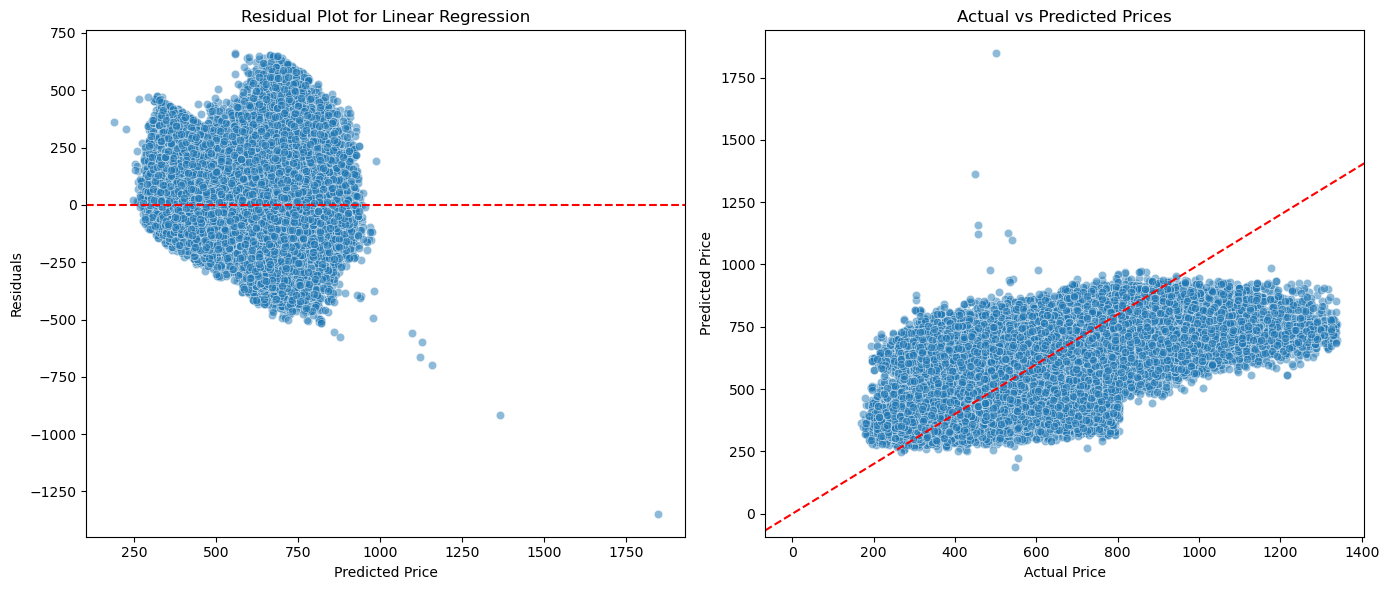

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ Residual Plot
residuals = y_test - y_pred_updated
sns.scatterplot(x=y_pred_updated, y=residuals, alpha=0.5, ax=axes[0])
axes[0].axhline(0, color="red", linestyle="--")  # קו אפס
axes[0].set_xlabel("Predicted Price")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residual Plot for Linear Regression")

# 2️⃣ Actual vs. Predicted Prices
sns.scatterplot(x=y_test, y=y_pred_updated, alpha=0.5, ax=axes[1])
axes[1].axline([0, 0], slope=1, color="red", linestyle="--")  # קו y=x
axes[1].set_xlabel("Actual Price")
axes[1].set_ylabel("Predicted Price")
axes[1].set_title("Actual vs Predicted Prices")

plt.tight_layout()
plt.show()


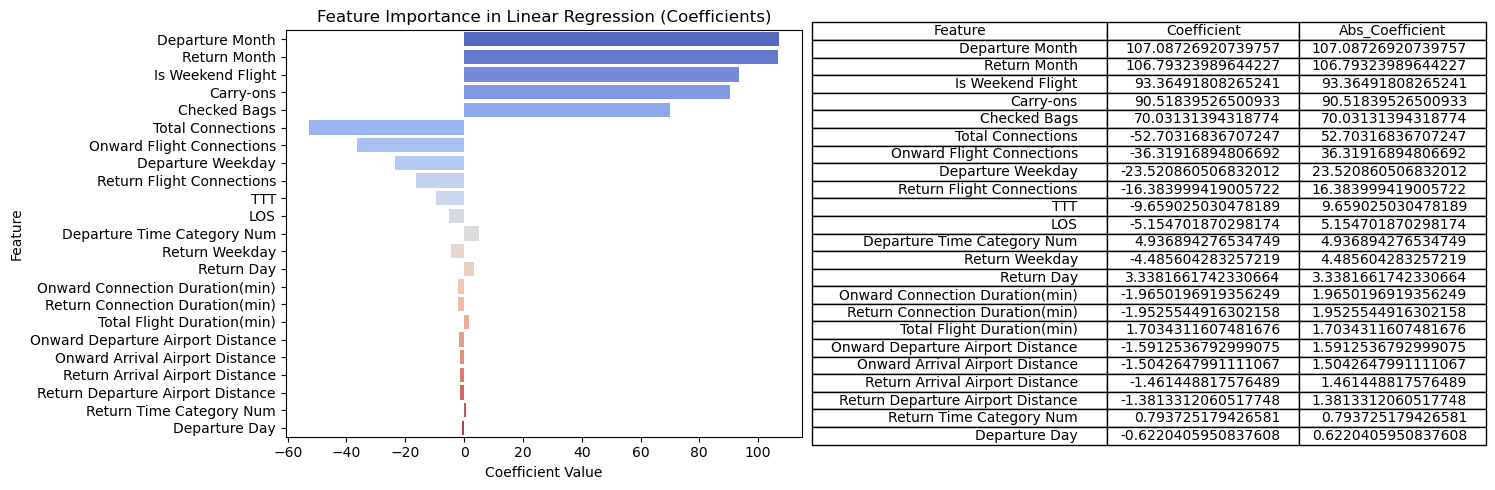

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ שליפת המשקלים (Coefficients) מרגרסיה לינארית
coefficients = model.coef_
features = X_train.columns

# 2️⃣ יצירת DataFrame מסודר להצגת הנתונים
importance_df = pd.DataFrame({"Feature": features, "Coefficient": coefficients})
importance_df["Abs_Coefficient"] = np.abs(importance_df["Coefficient"])  # השוואה לפי ערך מוחלט
importance_df = importance_df.sort_values(by="Abs_Coefficient", ascending=False)  # מיון לפי השפעה

# 3️⃣ יצירת גרף
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 🔹 גרף ברים אופקי (סדר יורד לפי השפעה)
sns.barplot(y=importance_df["Feature"], x=importance_df["Coefficient"], ax=axes[0], palette="coolwarm")
axes[0].set_title("Feature Importance in Linear Regression (Coefficients)")
axes[0].set_xlabel("Coefficient Value")
axes[0].set_ylabel("Feature")

# 🔹 יצירת טבלה עם הנתונים
axes[1].axis("tight")
axes[1].axis("off")
table = axes[1].table(cellText=importance_df.values, colLabels=importance_df.columns, loc="center")
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2])

# הצגת הגרפים
plt.tight_layout()
plt.show()



*##* Polynomial Features:
✔ Added degree-2 polynomial features to capture nonlinear relationships.
✔ Retrained the model with the new features.

🔹 Check performance (MSE, MAE, R²) for improvements. 🚀 

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [42]:
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.3, random_state=101)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 17508.18
Mean Absolute Error: 100.33
R-squared Score: 0.59
